In [ ]:
import pandas as pd
import numpy as np

In [6]:
date = [pd.Timestamp('2017-01-01'),
       pd.Timestamp('2017-01-02'),
       pd.Timestamp('2017-01-03')]
timeseries = pd.Series(np.random.randn(len(date)), index= date)
timeseries

2017-01-01    0.106915
2017-01-02    0.260558
2017-01-03    1.110845
dtype: float64

In [7]:
timeseries.index

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03'], dtype='datetime64[ns]', freq=None)

In [8]:
timeseries['2017-01-02']

0.2605577973373274

In [72]:
timeseries['2017-01-01': '2017-01-02']

2017-01-01    0.106915
2017-01-02    0.260558
dtype: float64

In [10]:
pd.date_range('2017-01-01','2017-01-19', freq = 'B')

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13', '2017-01-16', '2017-01-17',
               '2017-01-18', '2017-01-19'],
              dtype='datetime64[ns]', freq='B')

In [11]:
pd.date_range(start='2017-01-01',periods= 4 , freq= 'H')

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 01:00:00',
               '2017-01-01 02:00:00', '2017-01-01 03:00:00'],
              dtype='datetime64[ns]', freq='H')

In [12]:
pd.date_range(start='2017-01-01', periods=4, freq='T')

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:01:00',
               '2017-01-01 00:02:00', '2017-01-01 00:03:00'],
              dtype='datetime64[ns]', freq='T')

In [13]:
pd.date_range('2017-01-01', periods=4, freq='S')

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-01 00:00:01',
               '2017-01-01 00:00:02', '2017-01-01 00:00:03'],
              dtype='datetime64[ns]', freq='S')

In [15]:
pd.date_range(start='2017-01-01', periods=5, freq='1D1h1min10s')

DatetimeIndex(['2017-01-01 00:00:00', '2017-01-02 01:01:10',
               '2017-01-03 02:02:20', '2017-01-04 03:03:30',
               '2017-01-05 04:04:40'],
              dtype='datetime64[ns]', freq='90070S')

In [16]:
pd.date_range(start='2017-01-01', periods=5,freq= 'W-FRI')

DatetimeIndex(['2017-01-06', '2017-01-13', '2017-01-20', '2017-01-27',
               '2017-02-03'],
              dtype='datetime64[ns]', freq='W-FRI')

In [28]:
a = pd.date_range('2017-01-01', periods=10 ,freq= 'BAS-JAN')
print('\na\n',a)
b = pd.date_range('2017-01-01', periods=10, freq= 'A-FEB')
print('\nb\n',b)
print('\na union b')
print(a.union(b))


a
 DatetimeIndex(['2017-01-02', '2018-01-01', '2019-01-01', '2020-01-01',
               '2021-01-01', '2022-01-03', '2023-01-02', '2024-01-01',
               '2025-01-01', '2026-01-01'],
              dtype='datetime64[ns]', freq='BAS-JAN')

b
 DatetimeIndex(['2017-02-28', '2018-02-28', '2019-02-28', '2020-02-29',
               '2021-02-28', '2022-02-28', '2023-02-28', '2024-02-29',
               '2025-02-28', '2026-02-28'],
              dtype='datetime64[ns]', freq='A-FEB')

a union b
DatetimeIndex(['2017-01-02', '2017-02-28', '2018-01-01', '2018-02-28',
               '2019-01-01', '2019-02-28', '2020-01-01', '2020-02-29',
               '2021-01-01', '2021-02-28', '2022-01-03', '2022-02-28',
               '2023-01-02', '2023-02-28', '2024-01-01', '2024-02-29',
               '2025-01-01', '2025-02-28', '2026-01-01', '2026-02-28'],
              dtype='datetime64[ns]', freq=None)


In [47]:
# Downsample Scenario
# Let us take an example where customers are visiting a supermarket.
# You are interested in studying the customer incidence pattern at different time steps.
    
customerArrival = pd.date_range('18/09/2017 8:00', periods=600, freq='T')
custArrivalTs = pd.Series(np.random.randint(0,100,len(customerArrival)), index=customerArrival)
print(custArrivalTs.head(5))

# Downsample Data
# You are not interested in customer incidence every minute but you would want to get the mean customer incidence every 10 mins.
# The default aggregation is using the arithmetic mean.
custArrivalTs_downsampled = custArrivalTs.resample('10min')
custArrivalTs_downsampled.aggregate('mean').head()

2017-09-18 08:00:00    44
2017-09-18 08:01:00    40
2017-09-18 08:02:00    60
2017-09-18 08:03:00    47
2017-09-18 08:04:00    94
Freq: T, dtype: int32


2017-09-18 08:00:00    55.5
2017-09-18 08:10:00    56.6
2017-09-18 08:20:00    38.4
2017-09-18 08:30:00    55.1
2017-09-18 08:40:00    38.0
Freq: 10T, dtype: float64

In [49]:
# Custom Aggregation

custArrivalTs_downsampled = custArrivalTs.resample('10min').agg('sum')
custArrivalTs_downsampled.head()

2017-09-18 08:00:00    555
2017-09-18 08:10:00    566
2017-09-18 08:20:00    384
2017-09-18 08:30:00    551
2017-09-18 08:40:00    380
Freq: 10T, dtype: int32

In [50]:
custArrivalTs_downsampled = custArrivalTs.resample('10min').agg('max')
custArrivalTs_downsampled.head()

2017-09-18 08:00:00    94
2017-09-18 08:10:00    86
2017-09-18 08:20:00    99
2017-09-18 08:30:00    90
2017-09-18 08:40:00    98
Freq: 10T, dtype: int32

In [53]:
custArrivalTs.resample('1h', how=lambda m: random.choice(m)).head()

TypeError: resample() got an unexpected keyword argument 'how'

In [57]:
# Open High Low Close
# Let's say you are analyzing customer incidence data. You would wish to see the opening, closing, high and low incidence values in a given interval of time.
print(custArrivalTs)
custArrivalTs.resample('1h').agg('ohlc').head()

2017-09-18 08:00:00    44
2017-09-18 08:01:00    40
2017-09-18 08:02:00    60
2017-09-18 08:03:00    47
2017-09-18 08:04:00    94
                       ..
2017-09-18 17:55:00    20
2017-09-18 17:56:00    58
2017-09-18 17:57:00    33
2017-09-18 17:58:00    54
2017-09-18 17:59:00    39
Freq: T, Length: 600, dtype: int32


,open,high,low,close
2017-09-18 08:00:00,44,99,1,69
2017-09-18 09:00:00,75,99,0,93
2017-09-18 10:00:00,1,97,1,26
2017-09-18 11:00:00,31,99,1,72
2017-09-18 12:00:00,51,96,0,71


In [70]:
# Upsampling
# In upsampling, the frequency of the data points is more than that of the original data captured.

sampleRng = pd.date_range('9/18/2017 8:00', periods=10, freq='H')
sampleTs = pd.Series(np.random.randint(0, 100, len(sampleRng)), index=sampleRng)
print(sampleTs.head())
print()


# Upsample
print('Upsampled')
print(sampleTs.resample('15min').mean().head())
print()

print('Forward Fill')
print(sampleTs.resample('15min').ffill().head())
print()

print('Backward Fill with limit 2')
print(sampleTs.resample('15min').bfill(limit = 2).head())
print()

print('Interpolation')
print(sampleTs.resample('15min').interpolate().head())

2017-09-18 08:00:00    32
2017-09-18 09:00:00    36
2017-09-18 10:00:00    96
2017-09-18 11:00:00    98
2017-09-18 12:00:00    33
Freq: H, dtype: int32

Upsampled
2017-09-18 08:00:00    32.0
2017-09-18 08:15:00     NaN
2017-09-18 08:30:00     NaN
2017-09-18 08:45:00     NaN
2017-09-18 09:00:00    36.0
Freq: 15T, dtype: float64

Forward Fill
2017-09-18 08:00:00    32
2017-09-18 08:15:00    32
2017-09-18 08:30:00    32
2017-09-18 08:45:00    32
2017-09-18 09:00:00    36
Freq: 15T, dtype: int32

Backward Fill with limit 2
2017-09-18 08:00:00    32.0
2017-09-18 08:15:00     NaN
2017-09-18 08:30:00    36.0
2017-09-18 08:45:00    36.0
2017-09-18 09:00:00    36.0
Freq: 15T, dtype: float64

Interpolation
2017-09-18 08:00:00    32.0
2017-09-18 08:15:00    33.0
2017-09-18 08:30:00    34.0
2017-09-18 08:45:00    35.0
2017-09-18 09:00:00    36.0
Freq: 15T, dtype: float64


In [93]:
# Time Zones

import pytz

In [94]:
# Time Zones in Python
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [95]:
# Time Zone Object

usEastTz = pytz.timezone('US/Eastern')
usEastTz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

In [96]:
# Localization

timeZoneRng = pd.date_range('9/18/2017 9:30', periods=6, freq= 'D', tz ='UTC')
timeZoneTs = pd.DataFrame(np.random.randn(len(timeZoneRng)), index=timeZoneRng)
timeZoneTs.index.tz

<UTC>

In [99]:
# Conversion

print('Before conversion')
print(timeZoneTs)
print()

print('after conversion')
print(timeZoneTs.tz_convert('US/Eastern'))

Before conversion
                                  0
2017-09-18 09:30:00+00:00 -1.429946
2017-09-19 09:30:00+00:00  0.217134
2017-09-20 09:30:00+00:00 -0.694824
2017-09-21 09:30:00+00:00 -1.932416
2017-09-22 09:30:00+00:00 -0.027488
2017-09-23 09:30:00+00:00 -1.520827

after conversion
                                  0
2017-09-18 05:30:00-04:00 -1.429946
2017-09-19 05:30:00-04:00  0.217134
2017-09-20 05:30:00-04:00 -0.694824
2017-09-21 05:30:00-04:00 -1.932416
2017-09-22 05:30:00-04:00 -0.027488
2017-09-23 05:30:00-04:00 -1.520827


In [105]:
sampleTimeStamp = pd.Timestamp('2011-9-19 4:00')
timeStamp_utc = sampleTimeStamp.tz_localize('UTC')
timeStamp_utc

Timestamp('2011-09-19 04:00:00+0000', tz='UTC')

In [106]:
timeStamp_utc.tz_convert('US/Eastern')

Timestamp('2011-09-19 00:00:00-0400', tz='US/Eastern')

In [108]:
# Daylight Savings in following cells

from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [110]:
# 30 minutes before DST transition

stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [112]:
# 90 minutes before DST transition
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern')
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [113]:
stamp + 2 * Hour()

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

In [114]:
# Combining Different Timezones

dateRng = pd.date_range('9/19/2017 9:30', periods=10, freq='B')
timeSeries =  pd.Series(np.random.randn(len(dateRng)), index=dateRng)
tz1 = timeSeries[:7].tz_localize('Asia/Singapore')
tz2 = tz1[2:].tz_convert('Asia/Seoul')
combine = tz1 + tz2
combine.index

DatetimeIndex(['2017-09-19 01:30:00+00:00', '2017-09-20 01:30:00+00:00',
               '2017-09-21 01:30:00+00:00', '2017-09-22 01:30:00+00:00',
               '2017-09-25 01:30:00+00:00', '2017-09-26 01:30:00+00:00',
               '2017-09-27 01:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [115]:
print(tz1)
print(tz2)

2017-09-19 09:30:00+08:00   -0.782339
2017-09-20 09:30:00+08:00   -1.028772
2017-09-21 09:30:00+08:00   -0.933222
2017-09-22 09:30:00+08:00   -0.415400
2017-09-25 09:30:00+08:00   -0.036998
2017-09-26 09:30:00+08:00   -0.582230
2017-09-27 09:30:00+08:00   -0.521552
Freq: B, dtype: float64
2017-09-21 10:30:00+09:00   -0.933222
2017-09-22 10:30:00+09:00   -0.415400
2017-09-25 10:30:00+09:00   -0.036998
2017-09-26 10:30:00+09:00   -0.582230
2017-09-27 10:30:00+09:00   -0.521552
Freq: B, dtype: float64


2017-01-01    8
2017-02-01    6
2017-03-01    5
2017-04-01    7
2017-05-01    4
Freq: MS, dtype: int32


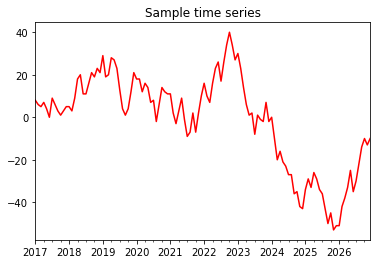

In [123]:
# Time Series Plotting

%matplotlib inline
sampleRng = pd.date_range(start='2017', periods=120, freq='MS')
sampleTs = pd.Series(np.random.randint(-10, 10, size=len(sampleRng)), sampleRng).cumsum()
print(sampleTs.head())
sampleTs.plot(c='r', title='Sample time series')

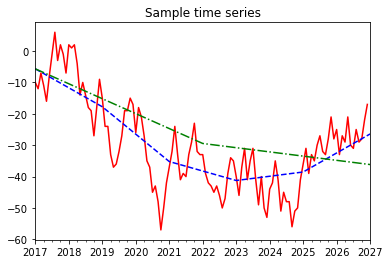

In [132]:
sampleRng = pd.date_range(start='2017', periods=120, freq='MS')
sampleTs = pd.Series(np.random.randint(-10, 10, size=len(sampleRng)), sampleRng).cumsum()
sampleTs.plot(c='r', title='Sample time series')
sampleTs.resample('2A').mean().plot(c='b', ls='--')
sampleTs.resample('5A').mean().plot(c='g', ls='-.')


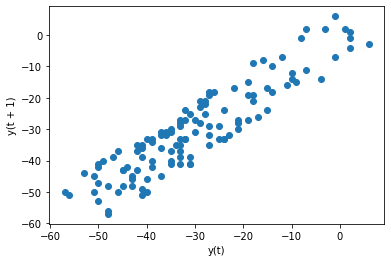

In [134]:
# Lag Plot Using Python

from pandas.plotting import lag_plot
lag_plot(sampleTs)

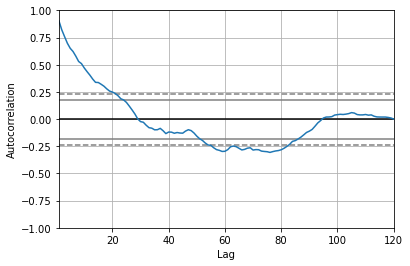

In [135]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(sampleTs)

In [137]:
# Stationarity
# In statistical terms, the mean, variance and the temporal correlation remain constant over time.
# A simpler definition is that there are no seasonal or trend components in the time series.

In [140]:
# Augmented Dickey - Fuller test
# ADF test is the best way to determine if time series data is stationary or not. This kind of test is known as Unit Root Test.
# The main objective of this test is that it identifies how the trend component determines the time series.

from statsmodels.tsa.stattools import adfuller

# The more negative the ADF statistic value is the more likely the data is stationary.
# The ADF Statistic should be compared to critical p-values that are at 1, 5, and 10%.
# If the ADF statistic value is less than the critical value at 5% and the p-value is less than 0.05, 
# then we can reject the null hypothesis that the data is non-stationary with 95% confidence level.

sampleRng = pd.date_range(start='2017', periods=120, freq='MS')
sampleTs = pd.Series(np.random.randint(-10, 10, size=len(sampleRng)), sampleRng).cumsum()
sampleTs

tsResult = adfuller(sampleTs)
print('ADF Statistic: %f' % tsResult[0])
print('p-value: %f' % tsResult[1])
for key, value in tsResult[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -1.142729
p-value: 0.697735
	1%: -3.487
	5%: -2.886
	10%: -2.580


In [141]:
# Auto Correlation Function
# Another way of determining stationarity is Autocorrelation Function. Here, you find the correlation 
# between two data points that are one time step away.
# When you visualize this correlation, you can get insights on the stationarity of the time series.
# If the ACF plot is having an exponential decay, it means the time series is stationary.

In [143]:
# Components Explained
# Trend: This component shows the overall series behavior - the slow change of values over time.
# Season: This shows the changes that happen in cycles that are less than one year.
# Cycles: Changes that happen for more than a year.
# Random: Anything that is not included in the above three components.
# The underlying assumption has to be that the time series data is stationary.

In [144]:
# Steps in Time Series Analysis

# Few steps to be followed while performing time series analysis:
# Check for Stationarity.
# Decompose the model into its various components.
# Analyse the components.
# Fit the time series forecasting model and predict future values.

In [146]:
# Seasonal Decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
sampleTs_decomp = seasonal_decompose(sampleTs, period=12) 
sampleTs_trend = sampleTs_decomp.trend 
sampleTs_seasonal = sampleTs_decomp.seasonal 
sampleTs_residual = sampleTs_decomp.resid

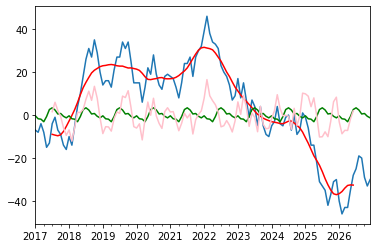

In [155]:
sampleTs.plot()
sampleTs_trend.plot(c='r')
sampleTs_seasonal.plot(c = 'g')
sampleTs_residual.plot(c = 'pink')

In [156]:
# Modeling Time Series
# So far, you have seen how to slice and dice the time series data and how to check for stationarity.
# The next logical step in time series analysis is forecasting. Forecasting in time series can be done in several ways.
# You will be learning about the following methodologies:

# Autoregressive

# Moving Average

# Autoregressive Moving Average

# Autoregressive Integrated Moving Average

In [161]:
# Autoregressive


from statsmodels.tsa.arima_model import ARIMA 
model = ARIMA(sampleTs, order=(1, 1, 0)) 
predValues = model.fit()

In [160]:
# Moving Average

model = ARIMA(sampleTs, order=(0, 1, 1)) 
movingAvgRes = model.fit() 

In [163]:
# Autoregressive Integrated Moving Average

# ARIMA
# ARIMA is the combination of Autoregressive and Moving Average. ARIMA stands for Autoregressive Integrated Moving Average.
# It is another model used for forecasting in Time Series Analysis.

model = ARIMA(sampleTs, order=(1, 0, 1)) 
arimares = model.fit() 

In [164]:
# Steps in Time Series
# The first step is to visualize the time series.

# The second step is to make the data stationary.

#  - This can be accomplished by 

#  - Detrending 

#  - Differencing

#  - Seasonality 
# Getting the optimal parameters through Auto Correlation and Partial Auto Correlation

# Build Model (AR , MA , ARMA , ARIMA) using the parameters

# Make Predictions

In [174]:
sampleRng1 = pd.date_range('2011-01-01', periods=5, freq='D')
sampleRng2 = pd.date_range('2011-01-01', periods=5, freq='M')

sampleTs1 = pd.Series(np.random.randn(len(sampleRng1)), index=sampleRng1)
sampleTs2 = pd.Series(np.random.randn(len(sampleRng2)), index=sampleRng2)
combine = sampleTs1 + sampleTs2
combine

2011-01-01   NaN
2011-01-02   NaN
2011-01-03   NaN
2011-01-04   NaN
2011-01-05   NaN
2011-01-31   NaN
2011-02-28   NaN
2011-03-31   NaN
2011-04-30   NaN
2011-05-31   NaN
dtype: float64

In [173]:
sampleTs1

2011-01-01    1.555569
2011-01-02   -0.060299
2011-01-03    0.138877
2011-01-04   -0.202856
2011-01-05   -0.550749
Freq: D, dtype: float64